In [1]:
'''
Author:     Ravindra Neralla
Date:       05232021
DSC 650: Assignment_10.2
'''
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()

In [2]:
#!pip install keras

In [3]:
results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)
imdb_dir = Path('imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

training_samples = 200
maxlen = 100
max_words = 1000
embedding_dim = 100

training_samples = 200
validation_samples = 10000

In [4]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [5]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 87393 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [6]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [7]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.summary()

In [8]:
# save the summary of the model into a file
summary_file = results_dir.joinpath('Model1_Summary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

result_model_file = results_dir.joinpath('pre_trained_glove_model.h5')
model.save_weights(result_model_file)

Epoch 1/10
7/7 [==============================] - 5s 553ms/step - loss: 0.6927 - acc: 0.5279 - val_loss: 0.6920 - val_acc: 0.5221
Epoch 2/10
7/7 [==============================] - 1s 174ms/step - loss: 0.5377 - acc: 0.9914 - val_loss: 0.6937 - val_acc: 0.5300
Epoch 3/10
7/7 [==============================] - 1s 174ms/step - loss: 0.3492 - acc: 0.9659 - val_loss: 0.7080 - val_acc: 0.5141
Epoch 4/10
7/7 [==============================] - 1s 172ms/step - loss: 0.1937 - acc: 1.0000 - val_loss: 0.7070 - val_acc: 0.5245
Epoch 5/10
7/7 [==============================] - 1s 184ms/step - loss: 0.1142 - acc: 1.0000 - val_loss: 0.7060 - val_acc: 0.5310
Epoch 6/10
7/7 [==============================] - 1s 171ms/step - loss: 0.0593 - acc: 1.0000 - val_loss: 0.7105 - val_acc: 0.5355
Epoch 7/10
7/7 [==============================] - 1s 173ms/step - loss: 0.0364 - acc: 1.0000 - val_loss: 0.7290 - val_acc: 0.5301
Epoch 8/10
7/7 [==============================] - 1s 173ms/step - loss: 0.0208 - acc: 1.00

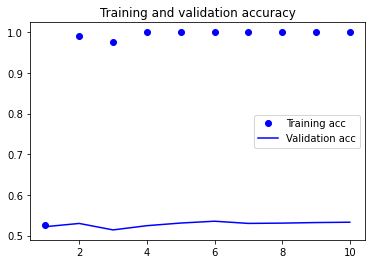

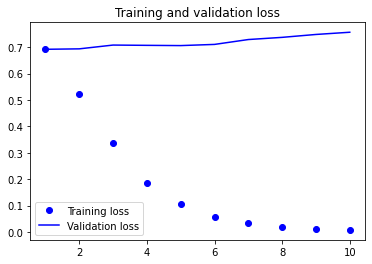

In [9]:
# Training Validation plot
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Model_1_Accuracy_Validation.png')
plt.savefig(img_file)
plt.show()

In [10]:
labels=[]
texts=[]

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


sequence = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model.load_weights(result_model_file)
eval = model.evaluate(x_test, y_test)
print("")
print(eval)

print("Complete: --- %s seconds has passed ---" % (time.time() - start_time))

782/782 [==============================] - 3s 4ms/step - loss: 0.7542 - acc: 0.5360

[0.7541640400886536, 0.5360400080680847]
Complete: --- 58.96685171127319 seconds has passed ---
